In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [27]:
final_data=pd.read_csv('/content/final_dataset_ready_5.csv')
final_data.head()

,product_category,customer_rating,engagement_score,CustomerEngagementScore,TransactionAmount_MA,Month,MonthlyTotalSpent,negative,neutral,positive
0,4,2.3,70.0,0.421121,0.902164,1,0.039589,1.0,0.0,0.0
1,2,4.2,52.0,0.089961,0.800382,1,0.266203,0.0,0.0,1.0
2,2,4.2,0.0,0.000000,0.800382,1,0.266203,0.0,0.0,0.0
3,2,4.2,0.0,0.000000,0.800382,1,0.266203,0.0,0.0,0.0
4,2,4.2,86.0,0.731421,0.800382,1,0.266203,1.0,0.0,0.0


In [17]:
# Ensure column names are stripped of whitespace
final_data.columns = final_data.columns.str.strip()

In [18]:
# Define Features (X) and Target (y)
X = final_data.drop(columns=['product_category'], errors='ignore')
y = final_data['product_category']

In [7]:
#Handle Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)
final_data['CustomerEngagementScore'].fillna(0, inplace=True)

In [19]:
final_data.isnull().sum()

,0
product_category,0
customer_rating,0
engagement_score,0
CustomerEngagementScore,0
TransactionAmount_MA,0
Month,0
MonthlyTotalSpent,0
negative,0
neutral,0
positive,0


In [20]:
#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Define Hyperparameter Grid for Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get Best Model from Grid Search
best_model = grid_search.best_estimator_


In [23]:
# Train the Best Model
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=42)

In [24]:
# Make Predictions
y_pred = best_model.predict(X_test)

In [25]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Model Evaluation:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.06
R-squared Score (R2): 0.97


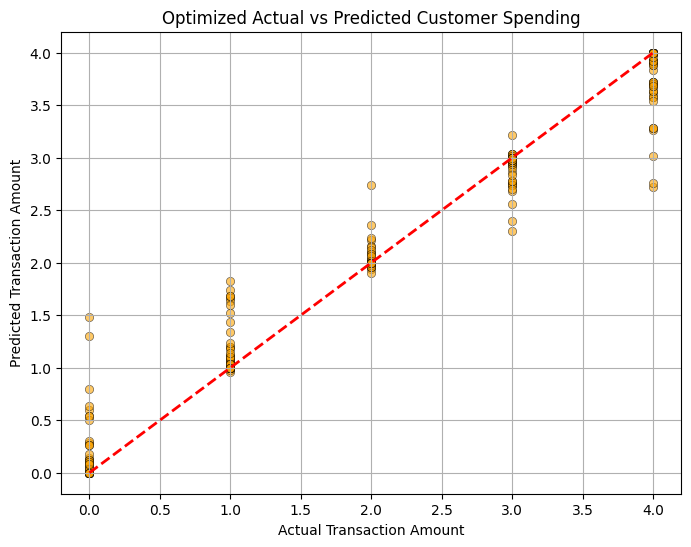

In [26]:
# Plot Actual vs. Predicted Values with improvements
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='orange', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Optimized Actual vs Predicted Customer Spending")
plt.grid(True)
plt.show()